# Week 5 - Model Selection

## Learning Objectives
+ Supervised and unsupervised learning
+ Train-Test Split
+ Preprocessing and Choice of Model
    + Classification using Naive Bayes
    + Using Pipeline in Sklearn
+ Model Validation 
    + Evaluation Metrics
    
For this tutorial, you need the following installed:



In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# A supervised learning example (regression)

We work on the ```sklearn``` iris dataset to identify how sepal length varies with sepal width, petal length and petal width. 

+ We split the dataset into train and test datasets.
+ We fit the linear regression model on the train dataset.
+ We use the linear regression model to predict on the test dataset.
+ We calculate the mean squared error to understand goodness of fit.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


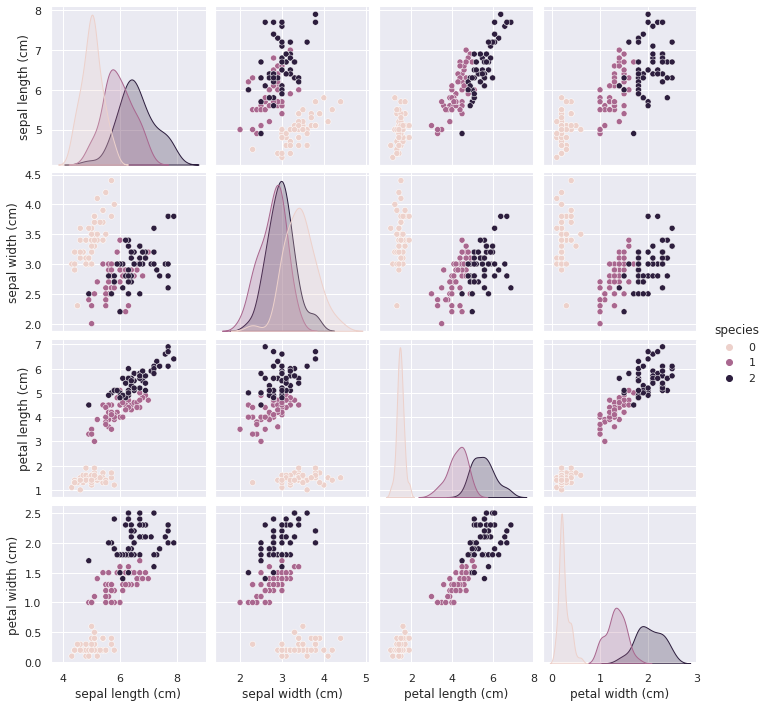

In [4]:
import seaborn as sns
sns.set_theme()

sns.pairplot(iris_df, hue= 'species')

It is good practice to scale the dataset using ```StandardScaler()``` but since data preprocessing is not the focus of this tutorial, and the magnitude of all features is the same, we skip this step.

We split the dataset using ```train_test_split``` from ```sklearn```.

Whenever randomization is part of a Scikit-learn algorithm, a ```random_state``` parameter may be provided to control the random number generator used. In order to obtain reproducible (i.e. constant) results across multiple program executions, we need to remove all uses of ```random_state=None```, which is the default. The recommended way in sklearn is to declare a ```rng``` variable at the top of the program, and pass it down to any object that accepts a ```random_state``` parameter.

In [5]:
X= iris_df[['petal width (cm)', 'petal length (cm)', 'sepal width (cm)']].values
y= iris_df['sepal length (cm)'].values

import numpy as np
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= rng)

We perform a linear regression to fit the train dataset. How do we find the $R^2$?

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8798190665245191

What are the coefficients that give this $R^2$?

In [7]:
lr.coef_

array([-0.70085243,  0.77693066,  0.63778351])

We use the fitted linear regression model to perform predictions in the test dataset. We can also calculate metrics using the predictions. 

In [8]:
lr.predict(X_test)
pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Squared Error: 0.10849851376871474
Mean Root Squared Error: 0.329391125819617


# An unsupervised learning example

We work on the ```sklearn``` iris dataset to identify how petal length and petal width vary with species. We use KMeans

In [10]:
X= iris_df[['petal width (cm)', 'petal length (cm)']].values
y= iris_df['species'].values

How do I do a train test split? 

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=rng)
km.fit(X)

KMeans(n_clusters=3, random_state=RandomState(MT19937) at 0x7F9313762490)

In [12]:
iris_labels = km.labels_
iris_df['species_predict'] = iris_labels

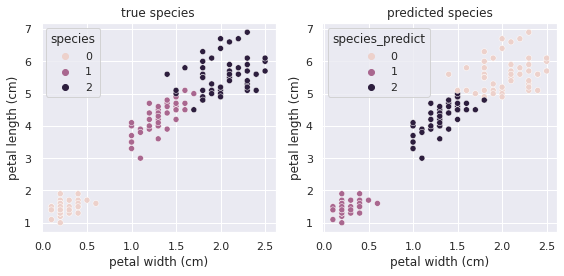

In [14]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot(data=iris_df, x="petal width (cm)", y="petal length (cm)", hue="species", ax=axs[0]).set(title = "true species")
sns.scatterplot(data=iris_df, x="petal width (cm)", y="petal length (cm)", hue="species_predict", ax=axs[1]).set(title = "predicted species")
f.tight_layout()

We can find the optimal number of clusters using the elbow method.

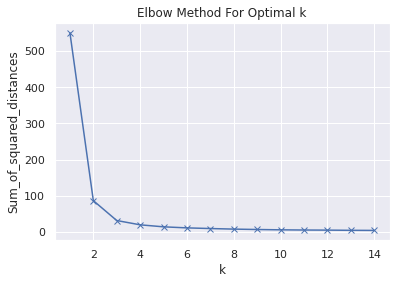

In [15]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# A supervised learning example (classification) on the Spam Detection dataset

Let's try to handle a new type of data- text data

Given a text document, we want to be able to classify whether it is a spam or not (binary classification). We use the SMS Spam dataset available in this [kaggle competition](https://www.kaggle.com/uciml/sms-spam-collection-dataset).

The data is available as a csv in which the first column is the class label. The "spam" label refers to message being categorized as spam, while "ham" label exists when the SMS is not a spam.

Let us first load the dataset.

In [16]:
sms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IT5006/Week 5/spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
sms.shape

(5572, 2)

# Train-Test split

Before we begin our modeling, let us first split the data into train and test split. For this, we can use the [```train_test_split```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) utility available in sklearn.

In [19]:
sms_train, sms_test = train_test_split(sms, test_size = 0.20, random_state = rng)

In [20]:
print("No of samples in train set: %s"%(len(sms_train)))
print("No of samples in test set: %s"%(len(sms_test)))

No of samples in train set: 4457
No of samples in test set: 1115


# Data Preprocessing

Let us first get quick descriptive statistics of the data. As the aim of the tutorial is not preprocessing, we will do quick operations and majorly focus on handling text data and learning to train a model.

In [21]:
sms_train.describe()

,label,message
count,4457,4457
unique,2,4176
top,ham,"Sorry, I'll call later"
freq,3866,25


In [22]:
sms_train.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      3866   3645                             Sorry, I'll call later   25
spam      591    531  HMV BONUS SPECIAL 500 pounds of genuine HMV vo...    3

In [23]:
sms_train['length'] = sms_train['message'].apply(len)
sms_train.head()

,label,message,length
1843,ham,Super da:)good replacement for murali,37
2959,ham,Sir send to group mail check it.,32
1270,ham,"Sorry chikku, my cell got some problem thts y ...",81
4693,ham,Pls give her the food preferably pap very slow...,147
4318,ham,Are you still playing with gautham?,35


## Punctuation and Stopword Removal

Stopword refers to commonly used words, such as "a", "the", "is", etc. These words are not providing very useful information and hence are generally removed during preprocessing.

Nltk library has a list of stopwords. We can use this list to filter out the stopwords from our documents. However, we must be careful about using all these preprocessing steps, and decide based on the data and task what preprocessing to perform.

In [24]:
import nltk
import string
import re

nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def wordCount(text, testing=False): 
    try:
        text = text.lower() # convert text to lower case
        if testing==True:
            print(text)
        regex = re.compile('['+re.escape(string.punctuation) + '0-9\\r\\t\\n'+']')
        txt = regex.sub('',text)  # remove punctuation
        if testing==True:
            print(txt)
        words = [w for w in txt.split(' ')
                if w not in stop] # remove stop words and words with length smaller than 3 letters. create array of remaining words
        if testing==True:
            print(words)
        return len(words)
    except:
        return 0

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
wordCount(sms_train['message'].iloc[103], testing=True)

he's really into skateboarding now despite the fact that he gets thrown off of it and winds up with bandages and shit all over his arms every five minutes
hes really into skateboarding now despite the fact that he gets thrown off of it and winds up with bandages and shit all over his arms every five minutes
['hes', 'really', 'skateboarding', 'despite', 'fact', 'gets', 'thrown', 'winds', 'bandages', 'shit', 'arms', 'every', 'five', 'minutes']


14

Let us now create two new features for the word length of the message and the processed word length. The processed word length is essentually just going to be all words in message sans the stopwords.

We can use df.apply to count the number of words in each message.

In [26]:
def wordLength(x):
  return len([w for w in x.split(' ')])

sms_train['word_length'] = sms_train['message'].apply(wordLength)
sms_train['processed_word_length'] = sms_train['message'].apply(wordCount)

In [27]:
sms_train.head()

,label,message,length,word_length,processed_word_length
1843,ham,Super da:)good replacement for murali,37,5,4
2959,ham,Sir send to group mail check it.,32,7,5
1270,ham,"Sorry chikku, my cell got some problem thts y ...",81,19,12
4693,ham,Pls give her the food preferably pap very slow...,147,30,13
4318,ham,Are you still playing with gautham?,35,6,3


As we have done the preprocessing on the train set, we need to do the feature generation similarly for the test set.

In [28]:
sms_test['length'] = sms_test['message'].apply(len)
sms_test['word_length'] = sms_test['message'].apply(lambda x: len([w for w in x.split(' ')]))
sms_test['processed_word_length'] = sms_test['message'].apply(lambda x: wordCount(x))

In [29]:
x_train = sms_train[['length', 'word_length', 'processed_word_length']].to_numpy()
x_test = sms_test[['length', 'word_length', 'processed_word_length']].to_numpy()

We also change the spam/ ham labels to numeric.

In [30]:
y_train = [1 if l=="spam" else 0 for l in sms_train['label']]
y_test = [1 if l=="spam" else 0 for l in sms_test['label']]

## CountVectorizer in sklearn

Sklearn includes a submodule which is dedicated to feature extraction from  [images](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.image) and [text](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text). A useful and simple utility in the text submodule is the [```CountVectorizer```](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer). It includes text preprocessing (punctuation removal and optional stopwords removal and tokenization), builds a dictionary of features (the vocabulary) and transforms documents to feature vectors. This also has option to specify n-gram text consideration,  in case you are interested in more sophisticated analysis. For this tutorial, we will just generate a word count vector based on the vocabulary constructed. 

![CountVectorizer](https://www.educative.io/api/edpresso/shot/5197621598617600/image/6596233398321152)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(sms_train.message)
print("No of samples in train set: %s"%(len(sms_train)))
X_train_counts.shape

No of samples in train set: 4457


(4457, 7698)

What features are in our dataset?

In [33]:
count_vect.get_feature_names_out()[1000:1010]

array(['apparently', 'appeal', 'appear', 'appendix', 'applausestore',
       'applebees', 'apples', 'application', 'apply', 'applyed'],
      dtype=object)

In [34]:
sms_train.message[200]

'I sent you  &lt;#&gt;  bucks'

In [35]:
X_train_counts.toarray()[200]

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
X_test_counts = count_vect.transform(sms_test.message)

In [38]:
np.sum(count_vect.transform(["jasdhasjkdhahsd"]).toarray())

0

In [39]:
print(X_train_counts.shape)
print(x_train.shape)
print(X_test_counts.shape)
print(x_test.shape)

(4457, 7698)
(4457, 3)
(1115, 7698)
(1115, 3)


Let us now create the dataset by concatenating the word length features and the word count vector. Do note that essentially the word count vector is also providing us information regarding the count of the words - which is similar to the length. We do not really expect to see huge improvements with this approach. But we are continuing in this tutorial so as to learn about mixing and using such differently created features. 

In [40]:
trainData = np.hstack((X_train_counts.todense(), x_train))
testData = np.hstack((X_test_counts.todense(), x_test))

# Classification using Naive Bayes Algorithm

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

If *y* is the prediction, and the *x*s are the features, then Bayes' theorem gives the conditional probability of y given x. Using the conditional assumption among features, the equations are simplified to provide us an estimate of *y*. The different Naive Bayes algorithms typically differ in the assumption of the distribution of feature given the *y*.

In this tutorial, we do not aim to understand a specific classifier, or its working. The aim is to understand how we can experiment with the features and perform predictions using sklearn. Once how to implement is understood, the classifiers in sklearn can be changed according to the problem at hand. 

In this tutorial, we will try with two different Naive Bayes algorithms available in sklearn. The [User Guide](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) is a useful resource for finding simple explanation regarding what can be used. 

In [41]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

clf = MultinomialNB()

In [42]:
clf.fit(x_train, y_train)

MultinomialNB()

In [43]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

def evaluate(y_pred, y_test):
    print("###########")

    c = confusion_matrix(y_test, y_pred) #[[TN FP],[FN,TP]]
    tn, fp, fn, tp = c.ravel() # returns a flattened array

    print(c)
    print("###########")
    print("Accuracy:"+str(accuracy_score(y_test, y_pred)))
    sens, spec = tp/(tp+fn), tn/(tn+fp) 
    print("Specificity:{0}, Sensitivity: {1}".format(spec, sens))
    print("Precision:"+str(precision_score(y_test, y_pred)))

In [44]:
y_pred = clf.predict(x_test)

evaluate(y_pred, y_test)

###########
[[958   1]
 [156   0]]
###########
Accuracy:0.8591928251121076
Specificity:0.9989572471324296, Sensitivity: 0.0
Precision:0.0


In [45]:
clf = ComplementNB()

clf.fit(trainData, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


ComplementNB()

In [46]:
y_pred = clf.predict(testData)

evaluate(y_pred, y_test)

###########
[[952   7]
 [ 12 144]]
###########
Accuracy:0.9829596412556054
Specificity:0.9927007299270073, Sensitivity: 0.9230769230769231
Precision:0.9536423841059603


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


# Putting it all together - Building a pipeline in sklearn

We have already seen the ```ColumnTransformer``` in sklearn. Also, we know the naming conventions in sklearn, and have a vague idea about how sklearn makes our life easy in putting the earlier blocks together for experimentation. [```Pipeline```](https://scikit-learn.org/stable/modules/compose.html#pipeline) in sklearn can be used for chaining different estimators together. When we have a fixed sequence of operations, this is usually helpful to put it all together. 

However, for that we would need the operations to also be in form of estimators. We can easily do so by using existing sklearn API, or writing our custom transformer if we have done our custom preprocessing.

## Writing Custom Transformer

You can implement a transformer from an arbitrary function with [```FunctionTransformer```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer). However, if do not have a specific function to implement as transformer, but want flexibility to implement our operations, we can write our transformer using two baseclasses from sklearn: 
1. [```BaseEstimator```](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html): The estimator provides for get_params and set_params functions. 
2. [```TransformerMixin```](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html): This class essentially provides us with fit_transform function when we define our own fit and transform functions.

In general, it is good to note that all estimators should specify all the parameters that can be set at the class level in their ```__init__``` as explicit keyword arguments. However, for our transformation, we are not storing some transformer parameter, and hence can also skip the ```__init__``` function.

Let's create an transformer that creates the ```length```, ```word_length``` and ```processed_word_length``` features in the dataframe.

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureCreator( BaseEstimator, TransformerMixin ):    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        self.df = pd.DataFrame()
        self.df['length'] = X.apply(len)
        self.df['word_length'] = X.apply(wordLength)
        self.df['processed_word_length'] = X.apply(wordCount)
        return self.df

In [48]:
proc1 = FeatureCreator()
x_train = proc1.fit_transform(sms_train.message)
print(x_train.shape)

(4457, 3)


In [49]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

## Preprocessing using FeatureUnion 

[```FeatureUnion```](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion) combines several transformer objects into a new transformer that combines their output. A ```FeatureUnion``` takes a list of transformer objects. During fitting, each of these is fit to the data **independently**. The transformers are applied in parallel, and the feature matrices they output are concatenated side-by-side into a larger matrix.

Do note here that the each transformer object is fit to the entire data. If you want to specify different transformer for different column - you can go back to the [```ColumnTransformer```](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) covered in previous tutorial. 

In [50]:
from sklearn.pipeline import Pipeline, FeatureUnion

tf_pipeline = Pipeline([("countvec", count_vect), ("to_dense",DenseTransformer())])
feats = FeatureUnion([("lengths", proc1), ("tf", tf_pipeline)])

In [51]:
feats.fit(sms_train.message)
x_train = feats.transform(sms_train.message)
print(x_train.shape)

(4457, 7701)


What should we do with the test dataset?

In [52]:
x_test =feats.transform(sms_test.message)

In [53]:
x_test.shape

(1115, 7701)

In [55]:
x_train.shape

(4457, 7701)

In [56]:
text_clf = Pipeline([('feats', feats),('clf', clf)])

text_clf.fit(sms_train.message, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('lengths', FeatureCreator()),
                                                ('tf',
                                                 Pipeline(steps=[('countvec',
                                                                  CountVectorizer()),
                                                                 ('to_dense',
                                                                  <__main__.DenseTransformer object at 0x7f930bfd6890>)]))])),
                ('clf', ComplementNB())])

In [57]:
y_pred = text_clf.predict(sms_test.message)
evaluate(y_pred, y_test)

###########
[[952   7]
 [ 12 144]]
###########
Accuracy:0.9829596412556054
Specificity:0.9927007299270073, Sensitivity: 0.9230769230769231
Precision:0.9536423841059603


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
